<a href="https://colab.research.google.com/github/allisson2156/Analise-de-Sentimentos-no-Mercado/blob/main/An%C3%A1lise_Sentimental_Mercado_de_A%C3%A7%C3%B5es_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
!pip install datasets
from datasets import load_dataset

dataset = load_dataset('zeroshot/twitter-financial-news-sentiment')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


  0%|          | 0/2 [00:00<?, ?it/s]

In [12]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 9543
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2388
    })
})


In [22]:
# Visualizando algumas linhas do conjunto de dados de treinamento
print(dataset['train'][0:5])

# Obtendo informações sobre o conjunto de dados
print(dataset['train'].features)


{'text': ['$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT', '$CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3', '$CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb', '$ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N', '$FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB'], 'label': [0, 0, 0, 0, 0]}
{'text': Value(dtype='string', id=None), 'label': Value(dtype='int64', id=None)}


In [24]:
# convertendo o dataset do Hugging Face para um DataFrame do pandas
df = pd.DataFrame(dataset['train'])

# removendo duplicatas
df.drop_duplicates(inplace=True)

# lidando com dados ausentes (neste caso, preenchendo com a string vazia)
df.fillna("", inplace=True)

# realizando a limpeza do texto
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace('[^\w\s]', '')

<ipython-input-24-bbac519931c3>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]', '')


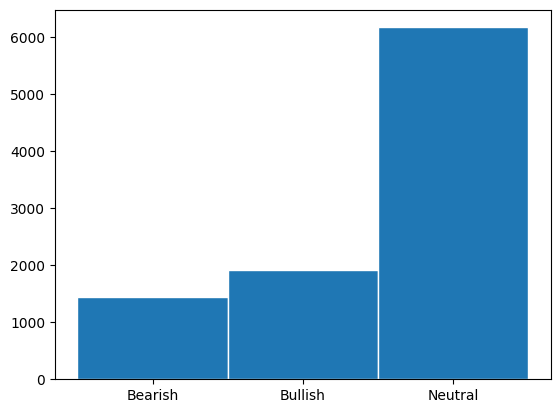

In [25]:
labels = dataset['train']['label']
plt.hist(labels, bins=np.arange(4)-0.5, edgecolor='white')
plt.xticks(range(3), ['Bearish', 'Bullish', 'Neutral'])
plt.show()

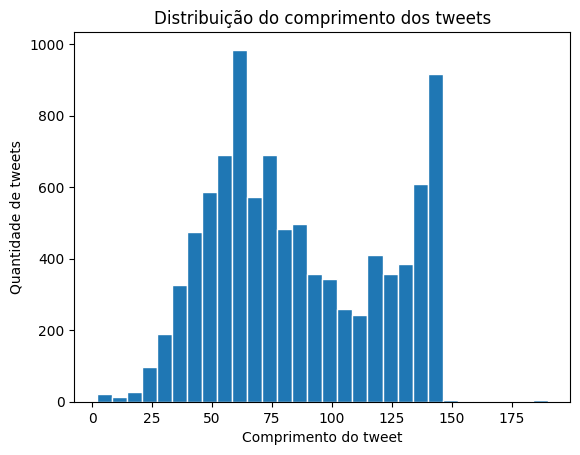

In [26]:
tweet_lengths = [len(tweet) for tweet in dataset['train']['text']]
plt.hist(tweet_lengths, bins=30, edgecolor='white')
plt.title('Distribuição do comprimento dos tweets')
plt.xlabel('Comprimento do tweet')
plt.ylabel('Quantidade de tweets')
plt.show()


In [23]:
for i in range(5):
    print(f'Tweet: {dataset["train"]["text"][i]}')
    print(f'Sentimento: {dataset["train"]["label"][i]}')
    print('\n')


Tweet: $BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT
Sentimento: 0


Tweet: $CCL $RCL - Nomura points to bookings weakness at Carnival and Royal Caribbean https://t.co/yGjpT2ReD3
Sentimento: 0


Tweet: $CX - Cemex cut at Credit Suisse, J.P. Morgan on weak building outlook https://t.co/KN1g4AWFIb
Sentimento: 0


Tweet: $ESS: BTIG Research cuts to Neutral https://t.co/MCyfTsXc2N
Sentimento: 0


Tweet: $FNKO - Funko slides after Piper Jaffray PT cut https://t.co/z37IJmCQzB
Sentimento: 0


